# QCTO - Workplace Module

### Analysis of Banking Transactions and Development of a Fraud Detection System
#### Done By: Nthabiseng Mokhachane

© ExploreAI 2025

---
<center>
  <img src="./Images/AI-in-Banking-Fraud-Detection.jpg" width="900" height="700"/>
</center>

## Table of Contents

<a href=#BC> 1. Background Context</a>

<a href=#one>2. Importing Packages</a>

<a href=#two>3. Data Collection and Description</a>

<a href=#three>4. Loading Data </a>

<a href=#four>5. Data Cleaning and Filtering</a>

<a href=#five>6. Exploratory Data Analysis (EDA)</a>

<a href=#six>7. Modeling </a>

<a href=#seven>8. Evaluation and Validation</a>

<a href=#eight>9. Final Model</a>

<a href=#nine>10. Conclusion and Future Work</a>

<a href=#ten>11. References</a>

---
 <a id="BC"></a>
##  **1. Background Context**
<a href=#cont>Back to Table of Contents</a>

---

Fraud is a monumental problem in business and something, particularly in the financial industry. It is characterised as suspicious activity that intends to deceive victims for a specific gain. In the financial world, the fraudster would gain access to a victim's financial structure, enabling them to perform unwarranted transactions. This could result in the loss of huge sums of money. Additionally, such events tarnish an organisation's reputation, leading customers to belief that their valuables aren't thoroughly secured. An number of activities are classified as fraudulent, this includes the following (Kanade, 2021):

* Money laundering
* Cyberattacks
* Fraudulent banking claims
* Forged bank checks
* Identity theft

These activities impose a significant business risk that needs to be identified in time and mitigated, to prevent business loss.(Kanade, 2021) Fraud detection is an example of such mitigation measures. It refers to the process of detecting suspicious activity and preventing fraudsters from gaining access to valuable assets, such as money. This process is infamous across various industries, particularly the banking industry. The measure tends to include predictive analytics (i.e., machine learning) to categorise a transaction as fraudulent or not, along with real-time monitoring of fraudulent events. (Kanade, 2021)
<center>
  <figure>
    <img src="./Images/fraud_detection_techniques.jpg" width="500" height="500"/>
    <figcaption>Fraud Detection Techniques: Breakdown of Approaches</figcaption>
  </figure>
</center>

The aim of this project is to perform a thorough analysis of online banking transactions and develop a robust model that can identify a transction as fraulent or legitimate with absolute accurracy. The notebook presented dives into the well structured methodology to achieve this objective. The notebook is starts off with the collection and description of the dataset containing historical online transactions. This dataset will be loaded, inspected and cleaned in the next two sections of the notebook. This is to ensure absolute data quality, which will impact the reliability of any visualisations and models developed from the data. In the EDA section, the cleaned and structured dataset will undergo statistical analysis and data visualisations. This is to aid in uncovering insights regarding fraudulent transactions and demystify patterns pertaining to them. The data will then be prepared for modelling in the data preprocessing section. All text data will be transformed to numerical representations, only features that are most relevant to the target variable will be kept in the dataset and new features will be engineered from consisting features. A range of models will be prepared in the modelling section, and optimised with the best hyperparameters. These models will be validated using unseen data and evaluated using appropriate metrics to determine the final model. This is all done in the Model evaluations and validation segment. The final model will be critically evaluated and enhanced to ensure optimal performance in the last section.  



### *1.1 Problem Statement*

A banking organisation wants a system that will detect and predict fraudulent transactions using historical transactions, along with a dashboard that will provide real time monitoring of transactions.

### *1.2 Objectives*

* Perform an exploratory analysis on historical banking transactions to identify key pattern between transaction characteristics and fraudulent classification
* Develop a sophisticated supervised machine learning algorithm that detect whether a transaction is fraudulent or not
* Develop a fully functional dashboard that will visualise cumalitive transactional information and highlight incoming fraudulent transaction.

---
<a href=#one></a>
## **2. Importing Packages**
<a href=#cont>Back to Table of Contents</a>

Before we embark on the analyses and model development, it is paramount to ensure that all the packages necessary for these procedures are within the notebook. This includes essential python libraries, typically utilised for data anlysis and model contruction such as:


*   **pandas :** useful for data analysis and manipulation, providing efficient tools to load, clean, filter, transform, and analyze structured data
*   **numpy :** vital for for numerical computing, providing support for fast array operations and mathematical calculati
*   **matplotlib :** creates static and interactive data visualisations
*   **seaborn :** essential for creating advanced and appealing visualisationstlysis
*   **sklearn :** provides machine learning tools for classification,   clustering, and model evaluation.
---

### *2.1 Basic Packages*

In [110]:
import pandas as pd
import numpy as np
import string
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt
%matplotlib inline 
import warnings
warnings.filterwarnings('ignore') #Suppress raised warnings

### *2.2 Preprocessing Packages*

In [112]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

### *2.3 Model Development Packages*

In [114]:
import mlflow
import mlflow.sklearn
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

### *2.4 Model Evaluation Packages*

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import f1_score

---
<a href=#two></a>
## **3. Data Collection and Description**
<a href=#cont>Back to Table of Contents</a>

---

The data utilised in this project is sourced from Kaggle (MANDAL, 2025). It consists of 51000 online banking transactions, and each record comprises of 11 features and one target variable classifying the transaction as fraudulent or legitimate based on real-world patterns. The features are as follows:

* **Transaction_ID:** The unique id for a transaction.
* **User_ID:** Unique value identifying a user performing the transaction.
* **Transaction_Amount:** The amount of money transfered in a transaction in US dollars.
* **Transaction_Type:** Describes the nature of the financial transaction.
* **Time_of_Transaction:** Specifies the time the transaction took place in 24-hour format.
* **Device_Used:** Identifies the type of device used to execute the transaction. 
* **Location:** Specifies the city the transaction was executed from.
* **Previous_Fraudulent_Transactions:** Tallies the number of times the specific user had fraudulent transactions in the past.
* **Account_Age:** The lenght of time since the user acount was opened.
* **Number_of_Transactions_Last_24H:** The amount of transactions that took place in the last 24 hours.
* **Payment_Method:** The banking method that was utilised to perform the transactions.
* **Fraudulent:** The classification of the transactions as fraudulent (1) or legitimate (0).

---
<a href=#three></a>
## **4. Loading Data**
<a href=#cont>Back to Table of Contents</a>

In this segment, the data collected for this project is loaded into a pandas DataFrame and then inspected to gain insight on the data stucture, as well as the overall quality of the data. This will inform the necessary procedures to be employed in the subsequent Data Cleaning and Filtering section.

---

### *4.1 Data Loading*

The dataset analysed in this notebook is imported from a csv file called `Fraud_Detecetion_Dataset.csv`. This file is located in the folder `Data`. Using the file path, the dataset is read into a pandas Dataframe and named `Fraud_df. The first few rows of the DataFarame are subsequently displyaed to provide a berief overview of its contents.

In [116]:
#Declare csv path
fraud_csv = "Data/Fraud_Detection_Dataset.csv"

#Load Fraud detection dataset into pandas DataFrame
fraud_df = pd.read_csv(fraud_csv)

#Display first 5 rows
fraud_df.head()

Transaction_ID  User_ID  Transaction_Amount Transaction_Type  \
0             T1     4174             1292.76   ATM Withdrawal   
1             T2     4507             1554.58   ATM Withdrawal   
2             T3     1860             2395.02   ATM Withdrawal   
3             T4     2294              100.10     Bill Payment   
4             T5     2130             1490.50      POS Payment   

   Time_of_Transaction Device_Used       Location  \
0                 16.0      Tablet  San Francisco   
1                 13.0      Mobile       New York   
2                  NaN      Mobile            NaN   
3                 15.0     Desktop        Chicago   
4                 19.0      Mobile  San Francisco   

   Previous_Fraudulent_Transactions  Account_Age  \
0                                 0          119   
1                                 4           79   
2                                 3          115   
3                                 4            3   
4                                 2           57   

   Number_of_Transactions_Last_24H Payment_Method  Fraudulent  
0                               13     Debit Card           0  
1                                3    Credit Card           0  
2                                9            NaN           0  
3                                4            UPI           0  
4                                7    Credit Card           0

### *4.2 Data Inspection*

In this segment, `Fraud_df` is vigorously inspected to illuminate its overall structure and to highlight any errors, missing values, duplicates and/or data inconsistencies that need to be cleaned and filtered. This ensures that the data used for exploratory analysis and model training is of the highest quality, resulting in quality models. 

#### *4.2.1 Shape of dataset*

The shape of the dataset is displayed below to give an overview of its size.

In [118]:
#Inspecting shape of dataset
print("Shape of dataset:",fraud_df.shape)

Shape of dataset: (51000, 12)


The DataFrame is seen to contain exactly 51 000 records and 12 columns, where 11 are predictor variables and one the target. Further inspection of the variable columns is required, to ensure that they accurately represent their contents.

#### *4.2.2 Column datatypes*

The datatypes for each column are displayed below to inspect whether they are appropriate  for the column contents.

In [120]:
#Inspecting datatypes of each column
fraud_df.dtypes

Transaction_ID                       object
User_ID                               int64
Transaction_Amount                  float64
Transaction_Type                     object
Time_of_Transaction                 float64
Device_Used                          object
Location                             object
Previous_Fraudulent_Transactions      int64
Account_Age                           int64
Number_of_Transactions_Last_24H       int64
Payment_Method                       object
Fraudulent                            int64
dtype: object

All columns seem to have suitable datatypes. Columns with numerical values, such as Transaction_Amount and Account_Age, are either of the type int64 or float64. All categorical columns are of the type object, indicating that they contain strings.

#### *4.2.3 Null values*

Each column is inspected for null values. These are empty cells within the columns, and are typically a result of erronous data entry. The presence of these values could skew the data and result in distorted insights. As such, these values should be located and properly handled based on the qualities of each column. The code below sums up the number of null values for each column and displays it as a DataFrame.

In [122]:
#Inspecting null values for each columns
print("Missing values for each column:") 
pd.DataFrame(fraud_df.isnull().sum(),columns= ['null value count'])

Missing values for each column:


null value count
Transaction_ID                                   0
User_ID                                          0
Transaction_Amount                            2520
Transaction_Type                                 0
Time_of_Transaction                           2552
Device_Used                                   2473
Location                                      2547
Previous_Fraudulent_Transactions                 0
Account_Age                                      0
Number_of_Transactions_Last_24H                  0
Payment_Method                                2469
Fraudulent                                       0

It is observed that 5 columns contain a significant number of null values. Two of the columns are numerical, the rest are categorical in nature. The value count for the columns with null values range between 2 469 and 2 552. `Time_of_Transaction` has the highest number with 2 552 null values and `Payment_Mwthod` has the lowest with 2 469. 7 of the 12 columns appear to contain zero null values. Amongst them are `Account_Age` and `Transaction_Type`.

#### *4.2.4 Duplicate rows*

The DataFrame is inspected for duplicate records. It is essential to locate such records and discard them, as their lower the integrity and quality of our dataset. Duplicate records can distort the data by inflating the frequency of values such as the mean and standard deviation. Furthermore, duplicate records can promote overfitting during model training and evaluation, thus reducing the quality of our models. The portion the duplicates make up in the entire dataset is also calculated. This is to highlight their significance in the dataset, ensuring that majority of the data is kept during the removal of the duplicate records.

In [124]:
#Inspect number of duplicate rows
dupli_row = fraud_df.duplicated().sum()
dupli_per = dupli_row/fraud_df.shape[0]*100
print("Number of duplicated rows:", dupli_row)
print("Percentage of duplicates:",round(dupli_per,2))

Number of duplicated rows: 881
Percentage of duplicates: 1.73


There are 881 duplicate records found within the DataFrame. They account for less than 2% of the data, therfore their removal from the dataset will not result in significant data loss. They will be dropped from the dataset in Data Cleaning section.

### *4.2.5 Data consistencies*

Here we have a closer look at the categorical columns, to identify any data inconsistencies that may be present and need to be clean in the next section. Since Transcation_ID is meant to contain only unique values, we expect the column to have 51 000 unique IDs. This is inspected below by counting the number of unique IDs found in the column. For the rest of the text columns, we identify the unique values within the columns since they have a small number of category values for each columns. If there is a spelling mistake or different casing for the same value, it will be indicated in the list of unique values.

In [126]:
#Count and display number of unique values for Transaction_ID column
print(f"Number of unique values for Transction_ID column:",len(fraud_df['Transaction_ID'].unique()))

Number of unique values for Transction_ID column: 50000


Out of the 51 000 records, 50 000 of them have unique Transaction IDs. This means that 1 000 IDs appear as duplicated in the dataset. Given that the data is determined to contain duplicates, 881 of the duplicates are accounted for. This leaves 119 records with duplicate transaction id, which will have to be found and properly dealt succeeding the removal of duplicate rows. 

In [136]:
#Declare columns to be inspected
columns = ['Transaction_Type','Device_Used','Location','Payment_Method']

#Find and display a list of unique values for each column
for column in columns:
    print(f"Unique values for {column} column:")
    print(fraud_df[column].unique())

Unique values for Transaction_Type column:
['ATM Withdrawal' 'Bill Payment' 'POS Payment' 'Bank Transfer'
 'Online Purchase']
Unique values for Device_Used column:
['Tablet' 'Mobile' 'Desktop' nan 'Unknown Device']
Unique values for Location column:
['San Francisco' 'New York' nan 'Chicago' 'Boston' 'Houston' 'Miami'
 'Los Angeles' 'Seattle']
Unique values for Payment_Method column:
['Debit Card' 'Credit Card' nan 'UPI' 'Net Banking' 'Invalid Method']


Each column seems to not have any values with spelling mistakes or inconsistent casing. All values, apart from the `NaN` value, conform to sentence casing where the first letter of each word is capitalised. The different categories for each column are seem to be as follows:

* **Transaction_Type:** `ATM Withdrawal`, `Bill Payment`, `POS Payment`, `Bank Transfer` and
`'Online Purchas`.
* **Device_Used:**  `Tablet`, `Mobile`, `Desktop` and `Unknown Device`.
* **Location:**  `San Francisco`, `New York`, `Chicago`, `Boston`, `Houston`, `Miami`, `Los Angeles`and `Seattle`.
* **Payment_Method:**  `Debit Card`, `Credit Card`, `UPI`, `Net Banking` and `Invalid Method`.



Given the different categories for each column, it is appropriate to replace the `NaN` values with a new category called `Unknown`. This ensure that records are not added to either of the existing categories, which could create bais and skew the data.

---
<a href=#four></a>
## **5. Data Cleaning and Filtering**
<a href=#cont>Back to Table of Contents</a>

---

### *5.1 Handling Null Values*

The columns that contain null values are handled in this portion of the notebook. Since a number of columns with null values are categorical in nature and contain values within in a finite group of values, a suitable imputation is `Unknown`. However, the column Device_Used already contains a category value that is `Unknown Device`, hence the null values for the columns are imputated with that category value. The 2 numerical columns are imputated with the mean value of that column. To ensure the imputation worked, we check again for the number of null values for each column.

In [138]:
#Fill missing values for colums with approriate values
#numerical columns filled with the column mean
#non-numerical columns filled with 'Unknown' , column Device_Used filled with 'Unknown Device'
for column in fraud_df.columns:
    if fraud_df[column].dtype == object and column == 'Device_Used':
        fraud_df.fillna({column:'Unknown Device'},inplace=True)
    elif fraud_df[column].dtype == object:
        fraud_df.fillna({column: 'Unknown'},inplace=True)
    else:
        fraud_df.fillna({column:fraud_df[column].mean()}, inplace=True)


In [140]:
#check missing values again
print("Missing values for each column:") 
pd.DataFrame(fraud_df.isnull().sum(),columns= ['null value count'])

Missing values for each column:


null value count
Transaction_ID                                   0
User_ID                                          0
Transaction_Amount                               0
Transaction_Type                                 0
Time_of_Transaction                              0
Device_Used                                      0
Location                                         0
Previous_Fraudulent_Transactions                 0
Account_Age                                      0
Number_of_Transactions_Last_24H                  0
Payment_Method                                   0
Fraudulent                                       0

There aren't any null values present for reach column. This indictes that all # imputations were successfull.

### *5.2 Handling Duplicate Rows*

The duplicate rows found during inspection are dropped from the DataFrame, keeping the original rows. This is done to prevent misleading conclusions during analysis due to bais introduced by duplicate records. An inspection is conducted again to check that all duplicated are indeed removed from the DataFrame.

In [142]:
#Drop duplicate rows
fraud_df.drop_duplicates(inplace=True)

#Check if duplicates where dropped
print("Number of duplicated rows:", fraud_df.duplicated().sum())

Number of duplicated rows: 0


### *5.3 Handling Data Inconsistencies*

Now that the duplicate recored are removed, the remaining duplicate values can be further inspected and dealt with. The number of unique transaction IDs are compared to the number or records ith in the dataset. The records that are still remaining as duplicates are displayed as a Datafeame and assesed further to identify approperiate means to handle them. 

In [146]:
#Count and display number of unique values for Transaction_ID column
print(f"Number of duplicate values for Transction_ID column:",(fraud_df.shape[0])-len(fraud_df['Transaction_ID'].unique()))

Number of duplicate values for Transction_ID column: 117


117 duplicate transaction IDs are found. These IDs are collected and their entire records are displayed below for analysis.

### *5.4 Text Cleaning*

The text data contained in numerical columns are all converted to lowercase format. This is to standardise the text, which makes further analysis simpler.

In [151]:
#convert all text columns to lowercase
for column in fraud_df.columns:
    if fraud_df[column].dtype == object and column != 'Transaction_ID':
        fraud_df[column]= fraud_df[column].apply(lambda x: x.lower())

#Display first 5 rows
fraud_df.head()

Transaction_ID  User_ID  Transaction_Amount Transaction_Type  \
0             T1     4174             1292.76   atm withdrawal   
1             T2     4507             1554.58   atm withdrawal   
2             T3     1860             2395.02   atm withdrawal   
3             T4     2294              100.10     bill payment   
4             T5     2130             1490.50      pos payment   

   Time_of_Transaction Device_Used       Location  \
0              16.0000      tablet  san francisco   
1              13.0000      mobile       new york   
2              11.4884      mobile        unknown   
3              15.0000     desktop        chicago   
4              19.0000      mobile  san francisco   

   Previous_Fraudulent_Transactions  Account_Age  \
0                                 0          119   
1                                 4           79   
2                                 3          115   
3                                 4            3   
4                                 2           57   

   Number_of_Transactions_Last_24H Payment_Method  Fraudulent  
0                               13     debit card           0  
1                                3    credit card           0  
2                                9        unknown           0  
3                                4            upi           0  
4                                7    credit card           0

All categorical columns appear to be in lowercase as adjusted.

---
<a href=#five></a>
## **6. Exploratory Data Analysis (EDA)**
<a href=#cont>Back to Table of Contents</a>

---


### *6.1 Statistical Summary*

A 5-number summary is generated, along with the count, mean and standard deviation of numerical columns. It is a statistical tool that describes the distribution of numerical features and aids with the comprehension of their spread, central tendency and variability. It consists of the following points:

* min: The minimal value of the feature in the dataset
* 25%: The 25th percentile value for the feature, known as the 1st quartile.
* 50%: The median value for the feature, known as the 2nd quartile.
* 75%: The 75th percentile value for the feature, known as the 3rd quartile.
* max: the maximum value of the feature.

Although User_ID and Fraudulent are numerical columns, they are excluded from this analysis. The two columns do not represent a meaningful numerical quantity that can be analysed for trends and distributions. Therefore, a new DataFrame is generated with the two columns removed and a statistical summary is generated for it. Moreover, columns/features with an object datatype are not removed from the Dataframe beacusee `describe()` automatically computes a summary soley based on numerical features.


In [154]:
#Removing irrelelant features
stat_df = fraud_df.drop(['User_ID','Fraudulent'],axis=1)

#statistical summary of DataFrame
stat_df.describe()


Transaction_Amount  Time_of_Transaction  \
count        50117.000000         50117.000000   
mean          2998.992990            11.488685   
std           4934.695465             6.746042   
min              5.030000             0.000000   
25%           1333.340000             6.000000   
50%           2655.340000            11.488400   
75%           3721.840000            17.000000   
max          49997.800000            23.000000   

       Previous_Fraudulent_Transactions   Account_Age  \
count                      50117.000000  50117.000000   
mean                           1.996428     60.028334   
std                            1.415514     34.392918   
min                            0.000000      1.000000   
25%                            1.000000     30.000000   
50%                            2.000000     60.000000   
75%                            3.000000     90.000000   
max                            4.000000    119.000000   

       Number_of_Transactions_Last_24H  
count                     50117.000000  
mean                          7.495840  
std                           4.019751  
min                           1.000000  
25%                           4.000000  
50%                           7.000000  
75%                          11.000000  
max                          14.000000

(Critical evaluation)

### *6.2 Box Plot Analysis*

The 5 number summary discussed above is visualised for each feature, using a box plot. The box plot indicate the min, max and the three quatiles, along with outliers. Features with similar ranges are grouped together on the same axis to ensure clear visibility of their box plots. Features with widely different ranges are plotted on seperate axis to prevent obscuring the spread or distribution of smaller features that would be squashed into tiny indecipherable boxes.

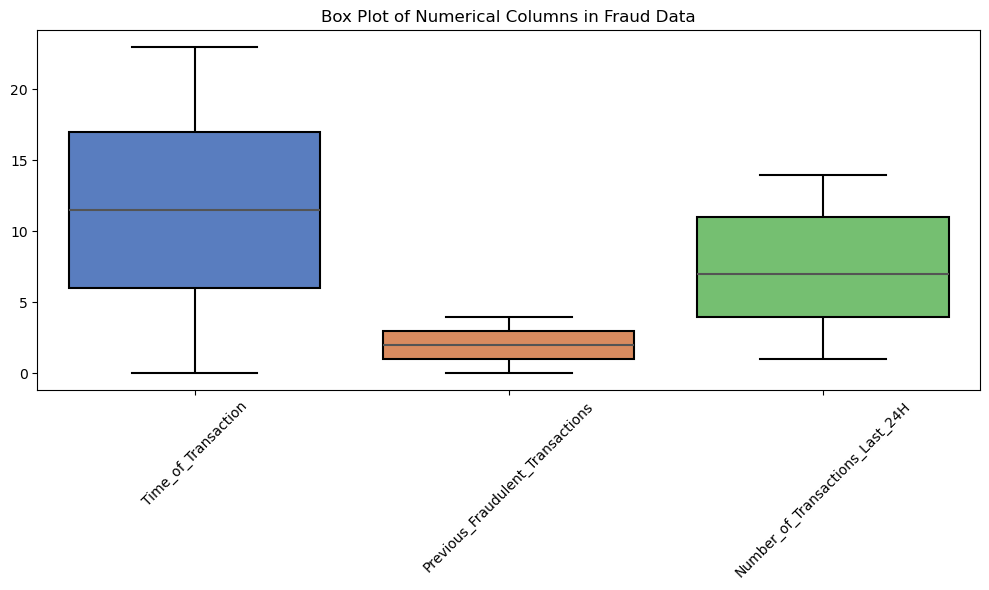

In [43]:
#Box plot of numerical column
numeric_cols = [col for col in stat_df.select_dtypes(include=['int64', 'float64']).columns if col not in ['Transaction_Amount','Account_Age']]

plt.figure(figsize=(10, 6))
sns.boxplot(data=stat_df[numeric_cols],
            showfliers=True,
            flierprops={'marker': 'o', 'markersize': 6, 'markerfacecolor': 'red', 'alpha': 0.6},  
            palette="muted",  
            linewidth=1.5, 
            boxprops={'edgecolor': 'black'},  
            whiskerprops={'color': 'black', 'linewidth': 1.5},  
            capprops={'color': 'black', 'linewidth': 1.5})
plt.title('Box Plot of Numerical Columns in Fraud Data')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

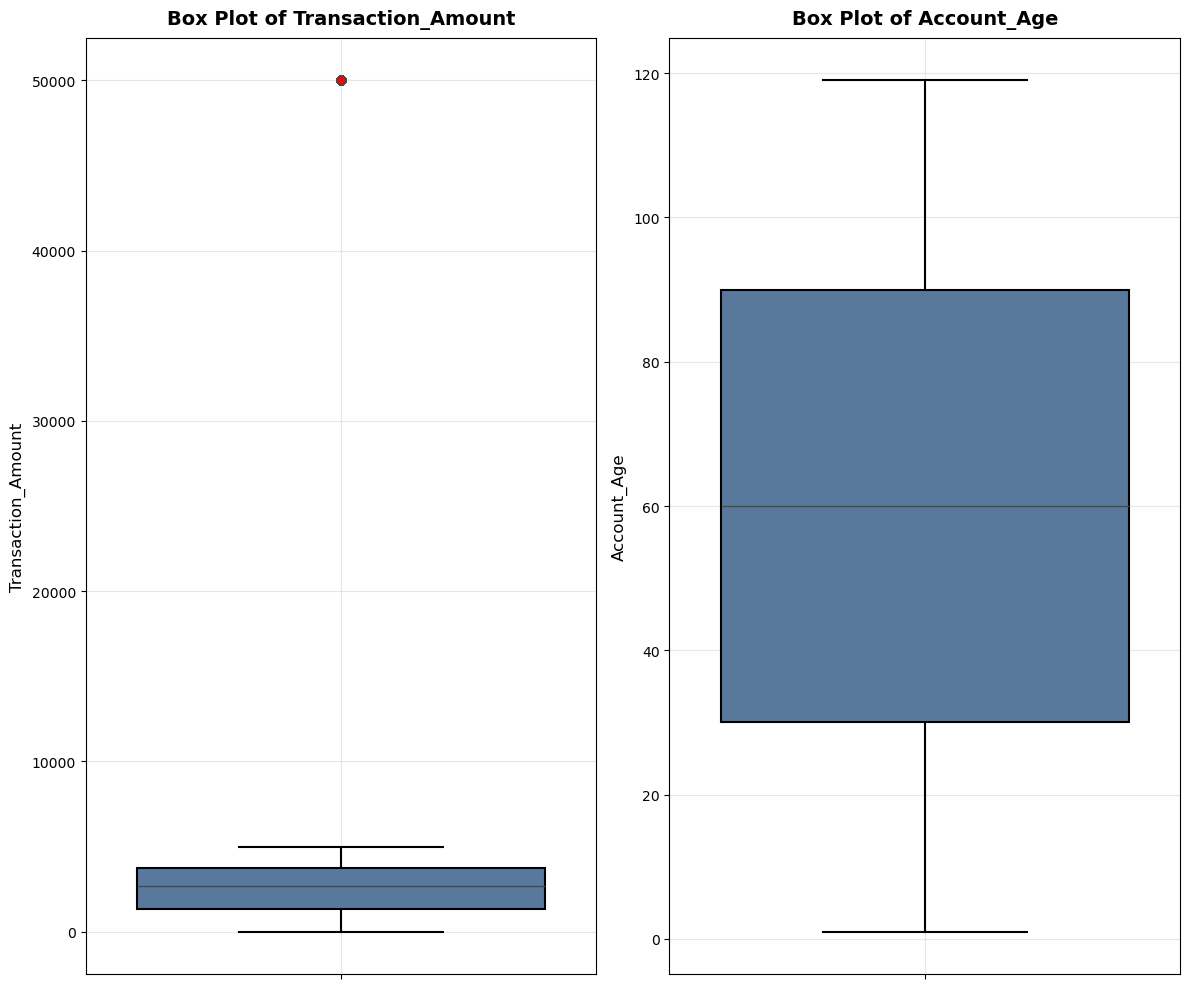

In [51]:
#Box plot of numerical column
numeric_cols = [col for col in stat_df.select_dtypes(include=['int64', 'float64']).columns if col in ['Transaction_Amount','Account_Age']]

# Create 2x2 subplot grid
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 10))
axes = axes.flatten()  # Flatten to easily index

for i, column in enumerate(numeric_cols):
    sns.boxplot(
        y=stat_df[column],  
        ax=axes[i],  
        showfliers=True,  
        flierprops={'marker': 'o', 'markersize': 6, 'markerfacecolor': 'red', 'alpha': 0.7},  # Stylish outliers
        color='#4C78A8',  
        boxprops={'edgecolor': 'black', 'linewidth': 1.5},  
        whiskerprops={'color': 'black', 'linewidth': 1.5}, 
        capprops={'color': 'black', 'linewidth': 1.5}  
    )
    axes[i].set_title(f'Box Plot of {column}', fontsize=14, weight='bold', pad=10)
    axes[i].set_ylabel(column, fontsize=12)  
    axes[i].grid(True, alpha=0.3)
    
plt.tight_layout()
plt.show()

(Critical evluation)

### *6.1 Distribution Analysis*

Further investigation is done on the distribution of each numerical feature. 

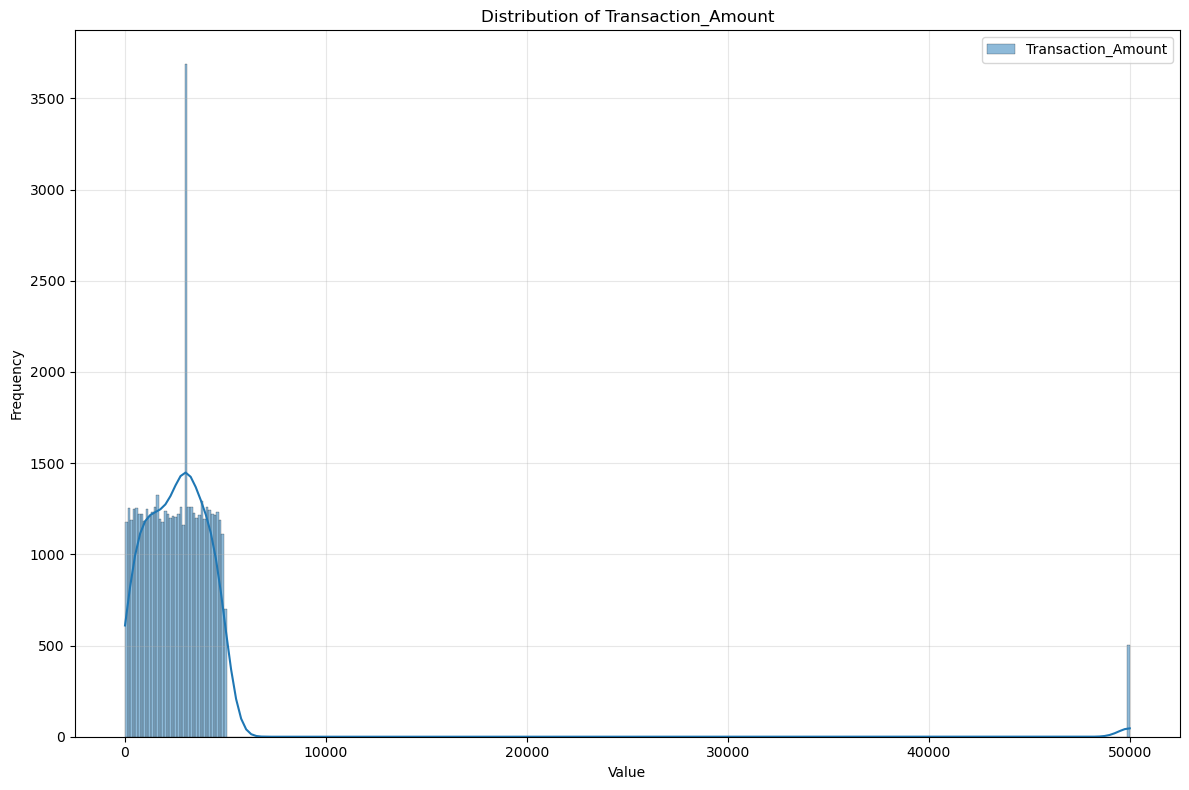

In [125]:
# Create distribution plots for Transaction_Amount
numeric_cols = [col for col in fraud_df.select_dtypes(include=['int64', 'float64']).columns if col not in ['User_ID', 'Fraudulent']]

# Create 2x2 subplot grid
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 10))
axes = axes.flatten()  # Flatten to easily index

plt.figure(figsize=(12, 8))
sns.histplot(data=fraud_df['Transaction_Amount'],label='Transaction_Amount', kde=True, stat='count', alpha=0.5)
plt.title('Distribution of Transaction_Amount')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

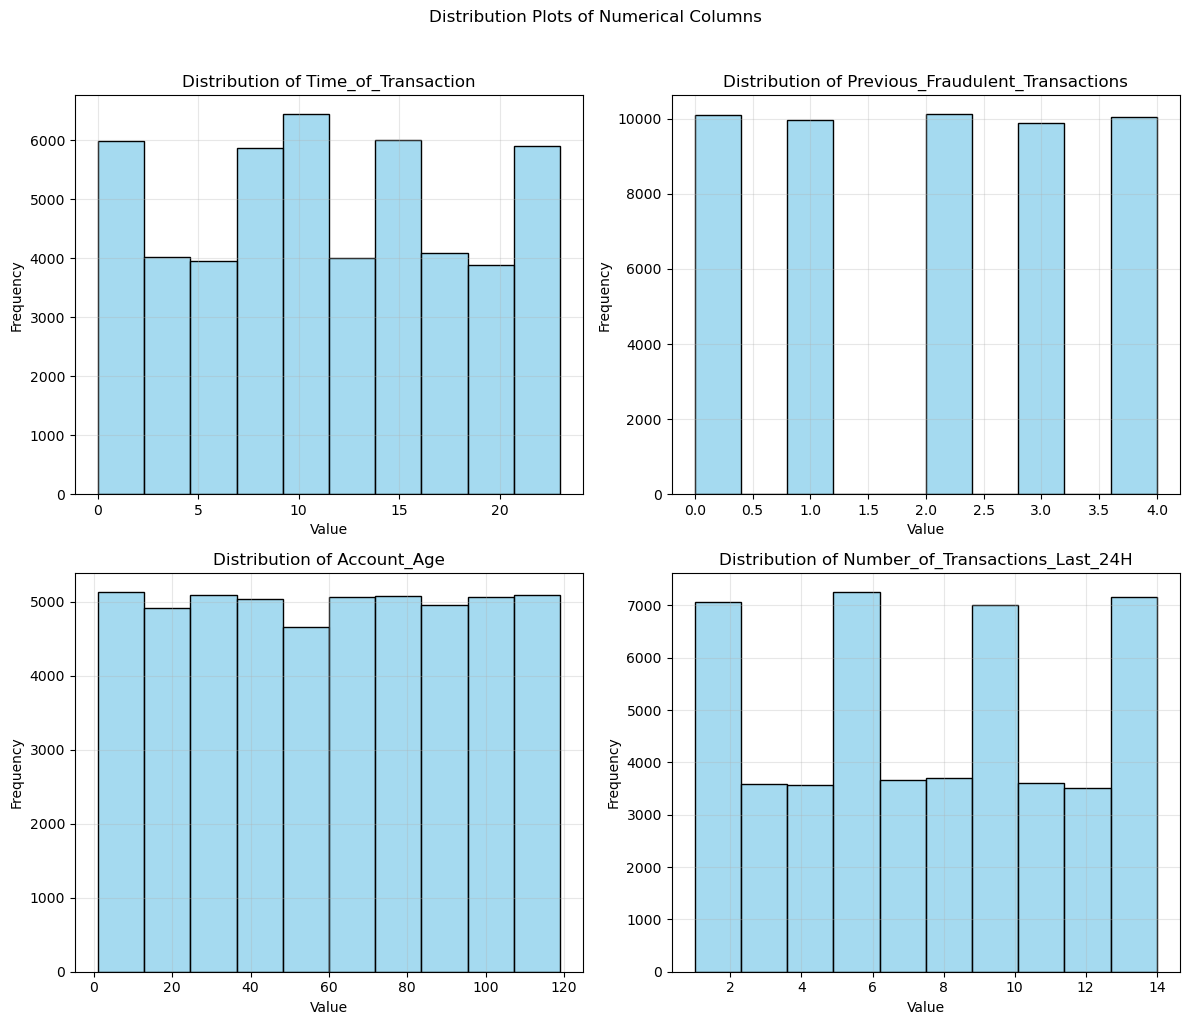

In [57]:
selected_cols = ['Time_of_Transaction','Previous_Fraudulent_Transactions','Account_Age','Number_of_Transactions_Last_24H']

# Create 2x2 subplot grid
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 10))
axes = axes.flatten()  # Flatten to easily index

for i,column in enumerate(selected_cols):
    sns.histplot(data=fraud_df[column], bins=10, ax=axes[i],color='skyblue')
    axes[i].set_title(f'Distribution of {column}')
    axes[i].set_xlabel('Value')
    axes[i].set_ylabel('Frequency')
    axes[i].grid(True, alpha=0.3)
    

# Adjust layout
plt.suptitle('Distribution Plots of Numerical Columns', y=1.02)
plt.tight_layout()
plt.show()

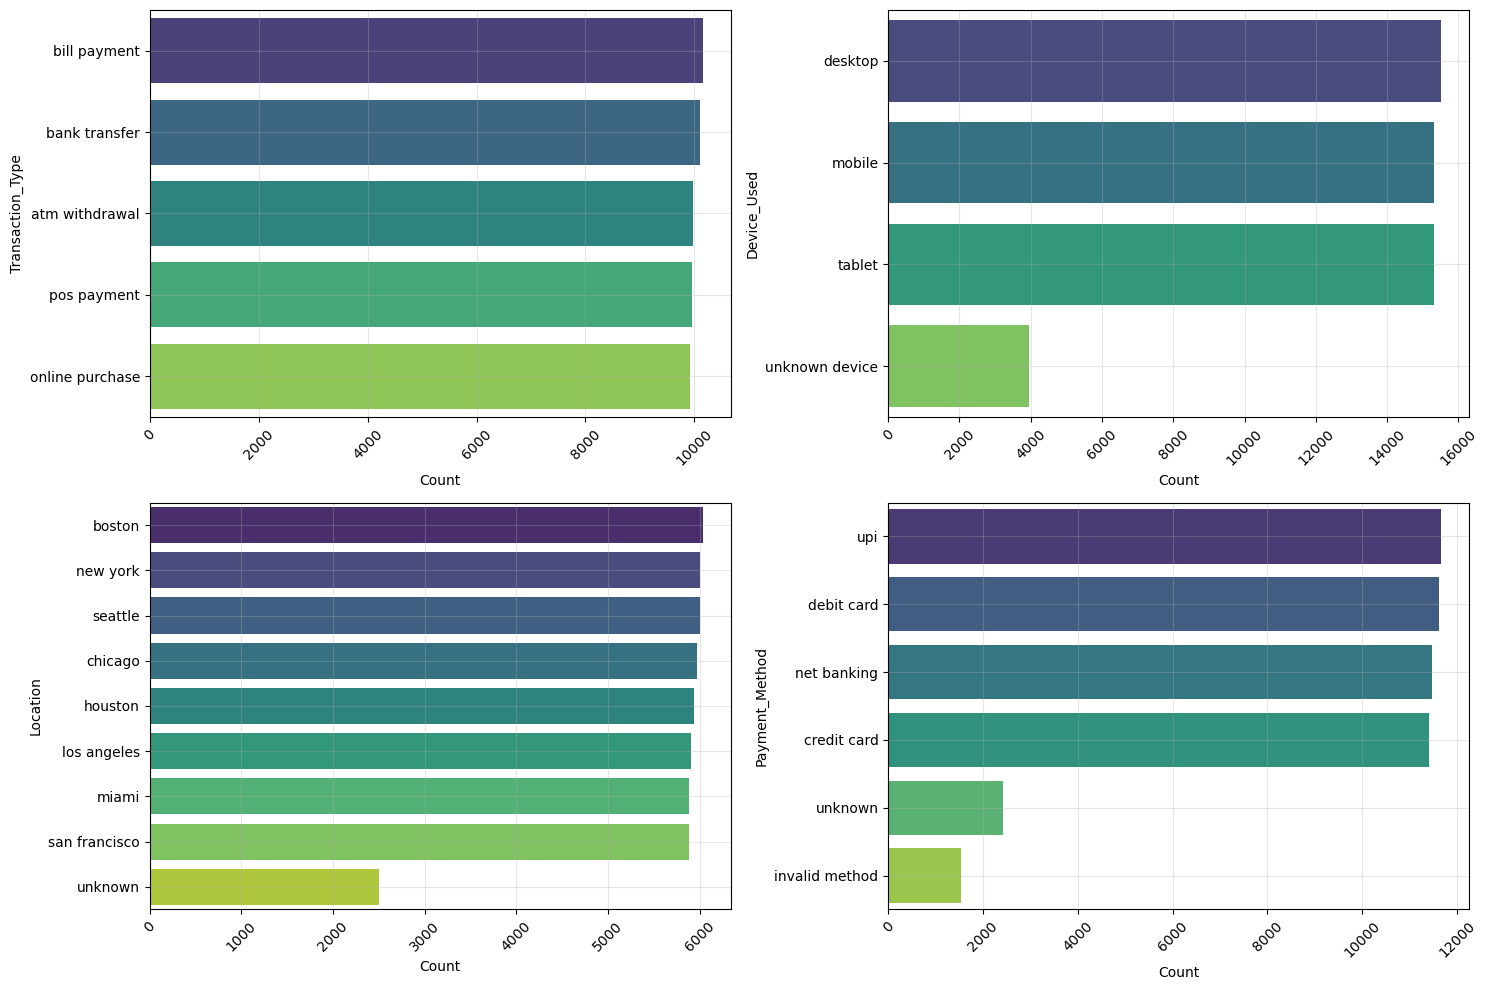

In [179]:
text_column =['Transaction_Type', 'Device_Used','Location','Payment_Method']

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15, 10))
axes = axes.flatten()  # Flatten to easily index

for i,column in enumerate(text_column):
    column_counts = fraud_df[column].value_counts().reset_index()
    column_counts.columns = [column, 'Count']
    sns.barplot(data=column_counts,x='Count', y=column,ax=axes[i],hue=column, legend=False, palette='viridis')
    axes[i].grid(True, alpha=0.3)
    axes[i].tick_params(axis='x', rotation=45)

# Adjust layout
plt.tight_layout()
plt.show() 

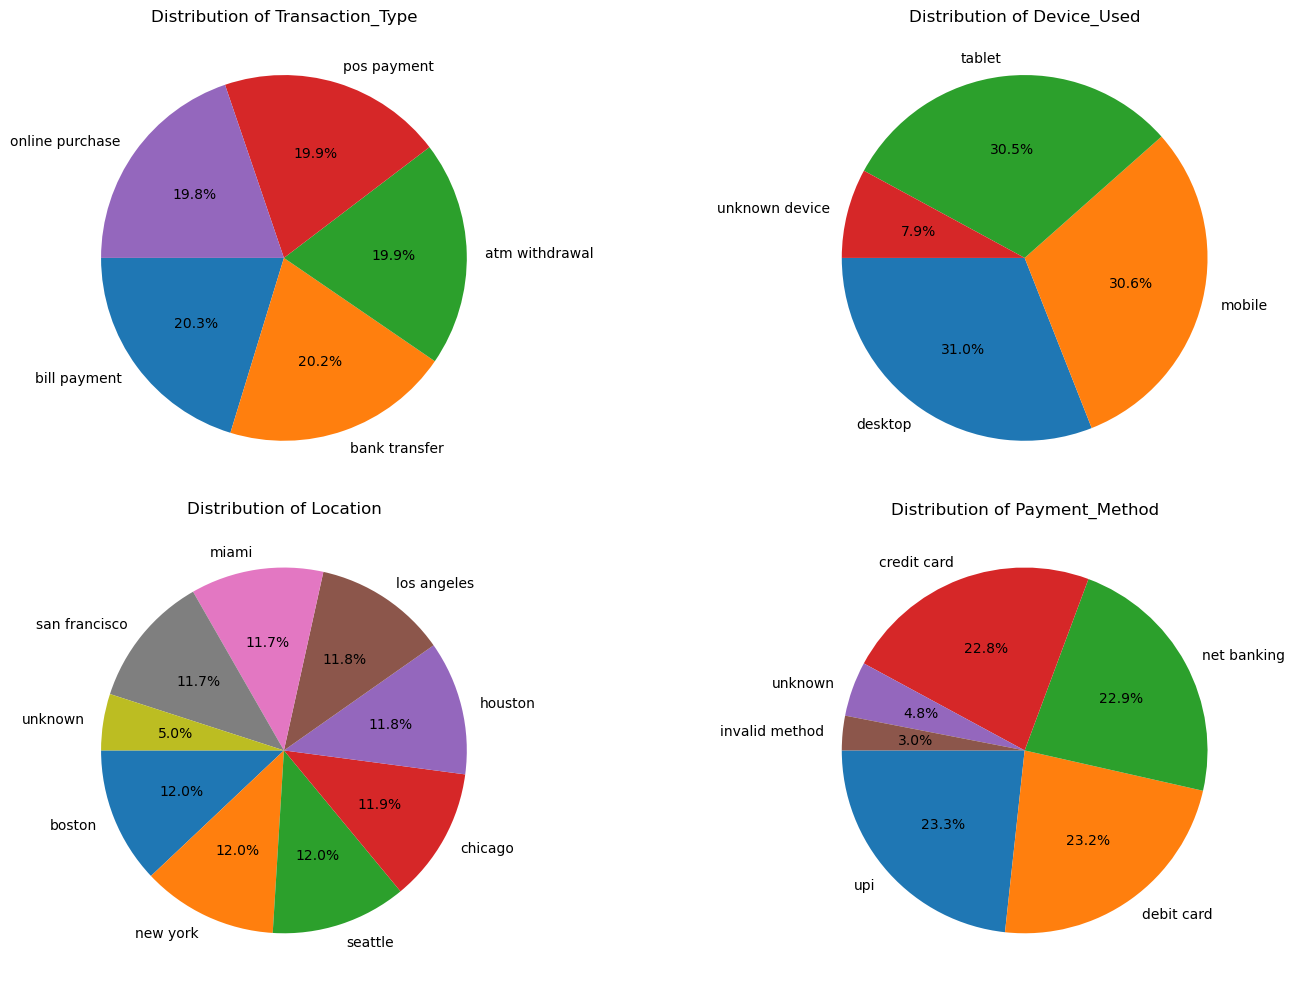

In [149]:
text_column =['Transaction_Type', 'Device_Used','Location','Payment_Method']

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15, 10))
axes = axes.flatten()  # Flatten to easily index

for i, column in enumerate(text_column):
    # Calculate counts for the current column
    column_counts = fraud_df[column].value_counts()
    
    # Create pie chart
    axes[i].pie(column_counts, labels=column_counts.index, autopct='%1.1f%%', startangle=180)
    axes[i].set_title(f'Distribution of {column}')

# Adjust layout
plt.tight_layout()
plt.show()

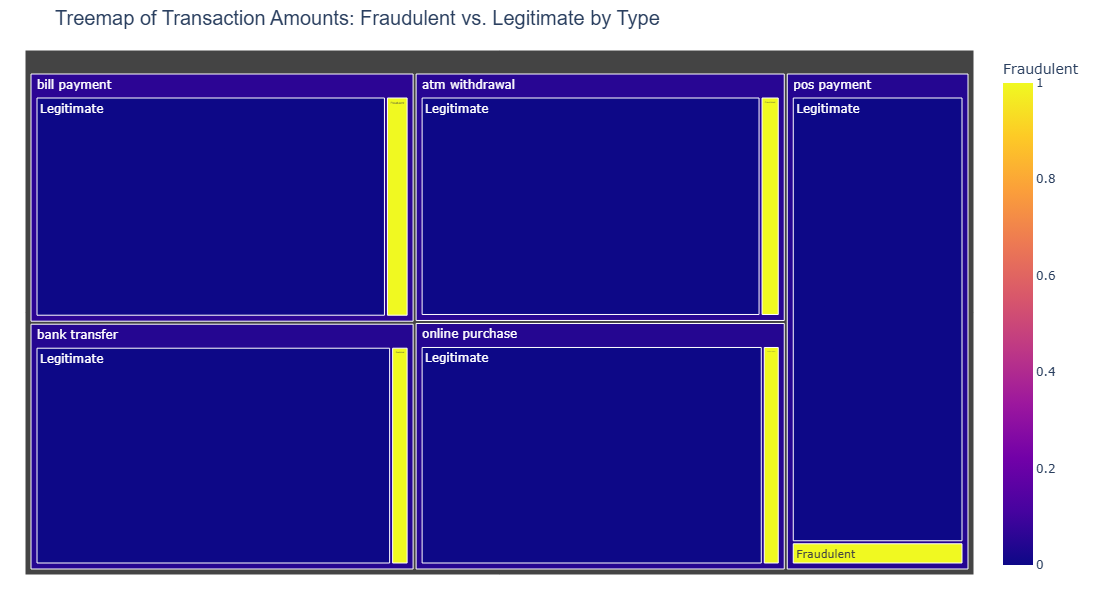

In [79]:
# Aggregate data: sum Transaction_Amount by Transaction_Type and Is_Fraud
agg_df = fraud_df.groupby(['Transaction_Type', 'Fraudulent'])['Transaction_Amount'].sum().reset_index()

# Add a readable label for fraud status
agg_df['Fraud_Status'] = agg_df['Fraudulent'].map({0: 'Legitimate', 1: 'Fraudulent'})

# Create interactive treemap
fig = px.treemap(
    agg_df,
    path=['Transaction_Type', 'Fraud_Status'],  # Hierarchy: Type -> Fraud Status
    values='Transaction_Amount',  # Size based on total amount
    color='Fraudulent',  # Color by fraud status
    color_discrete_map={0: '#4C78A8', 1: '#F58518'},  # Blue for legit, orange for fraud
    title="Treemap of Transaction Amounts: Fraudulent vs. Legitimate by Type",
    hover_data=['Transaction_Amount']  # Show amount on hover
)

# Update layout for visual appeal
fig.update_layout(
    width=900,
    height=600,
    title_font_size=20,
    title_font_family="Arial",
    margin=dict(t=50, l=25, r=25, b=25)
)

# Show plot
fig.show()

<Figure size 1000x1000 with 0 Axes>

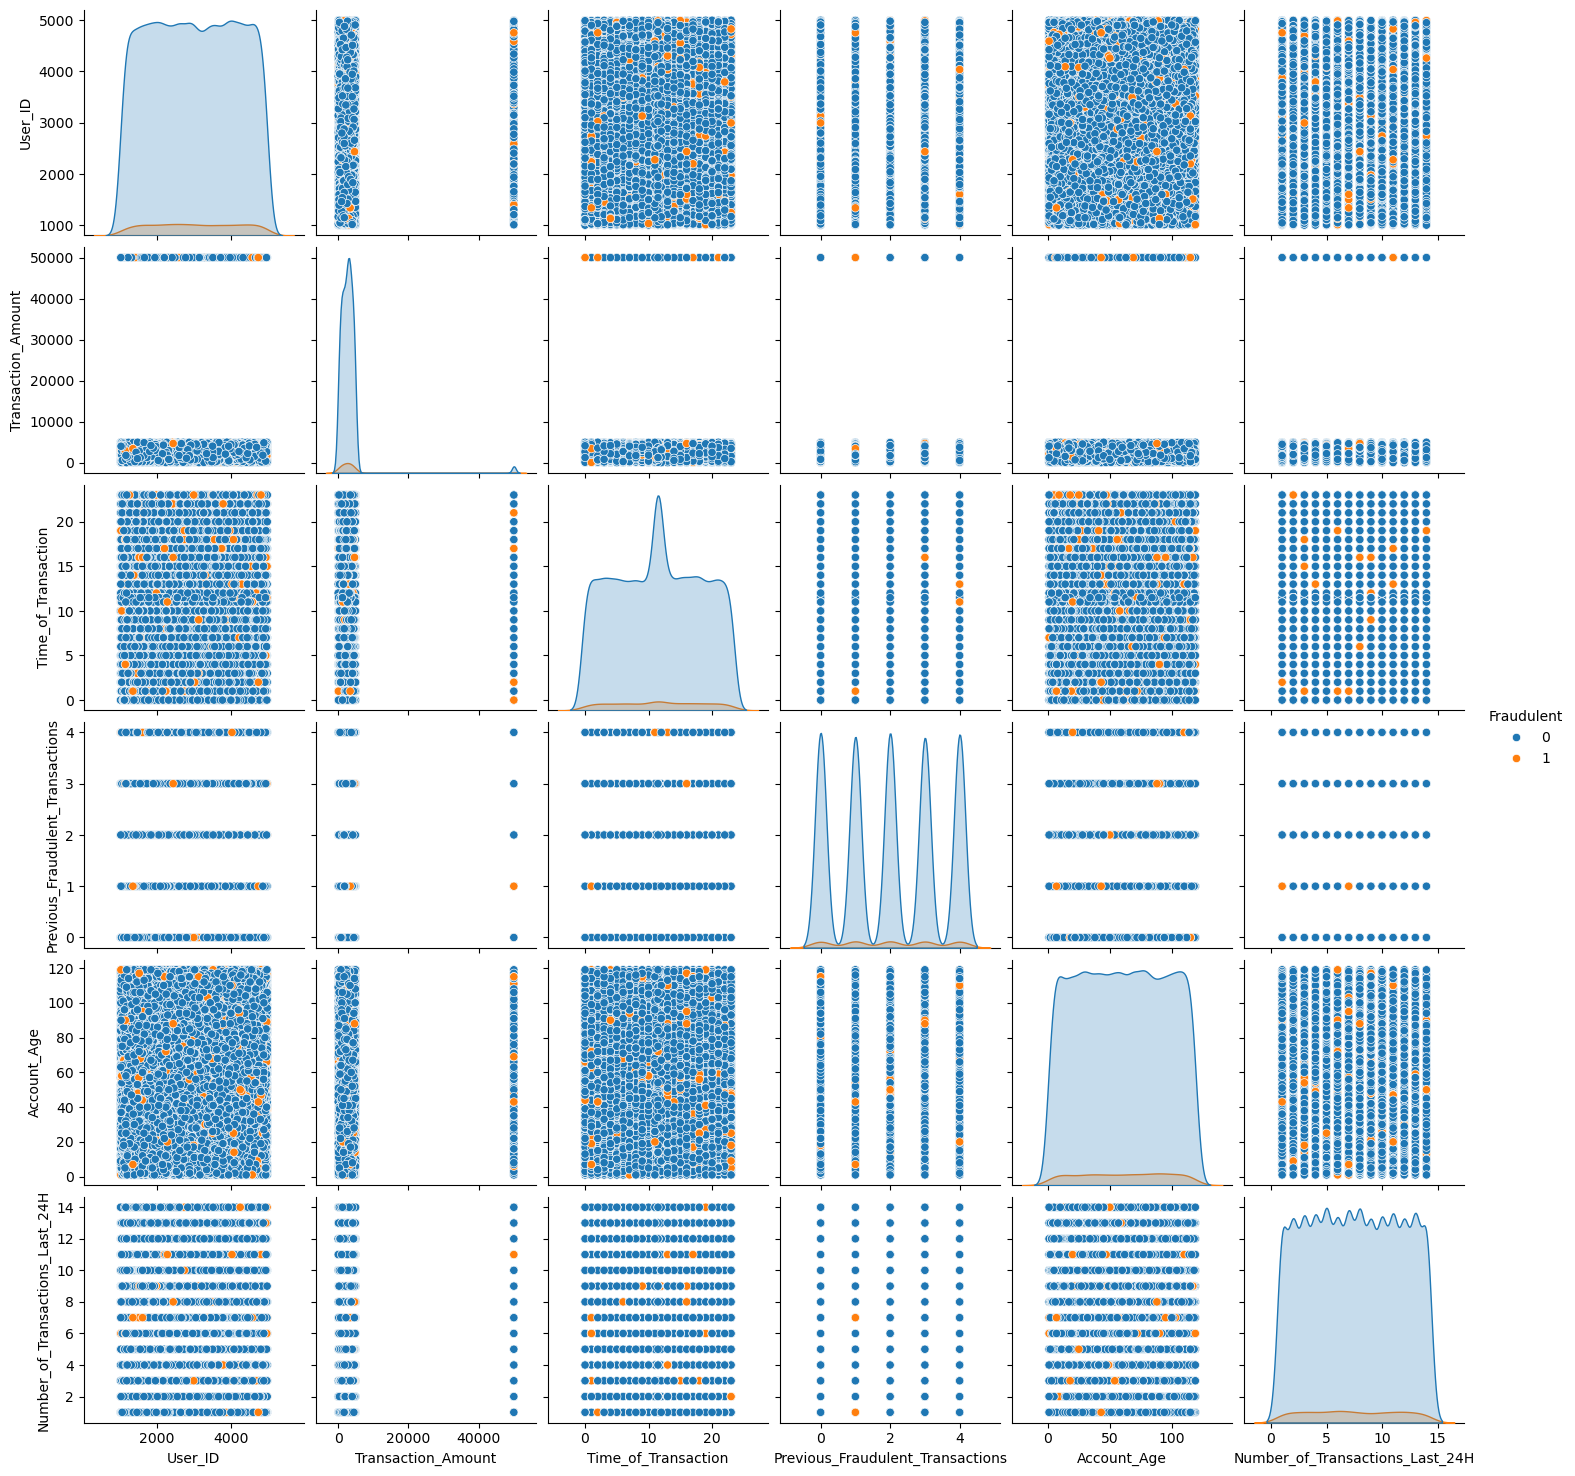

In [62]:
#Set image size
plt.figure(figsize=(10,10))

# Create the pairplot
sns.pairplot(fraud_df, hue='Fraudulent')  # 'hue' adds color based on a categorical variable

# Display the plot
plt.show()

---
<a href=#six></a>
## **Modeling**
<a href=#cont>Back to Table of Contents</a>

* **Purpose:** Develop and train predictive or statistical models.
* **Details:** Describe the choice of models, feature selection and engineering processes, and show how the models are trained. Include code for setting up the models and explanations of the model parameters.
---


In [ ]:
Data preprocessing
- lable encoding for object columns
- split data into x an y
- split data into train and test sets
- scale the x sets
- now have the sets i need

In [ ]:
Modelling
- have an array of models for testing
- have an array of hyper parameters for each model
- use grid search for hyper parameter tuning
- train models on best hyper parameters
- visualise the training space
- track all training with ml flow


In [ ]:
#Please use code cells to code in and do not forget to comment your code.

---
<a href=#seven></a>
## **Evaluation and Validation**
<a href=#cont>Back to Table of Contents</a>

* **Purpose:** Evaluate and validate the effectiveness and accuracy of the models.
* **Details:** Present metrics used to evaluate the models, such as accuracy, precision, recall, F1-score, etc. Discuss validation techniques employed, such as cross-validation or train/test split.
---

Evaluation
- cast predictions for the test set
- calculate all valuable metrics
- compare metrics to locate the best model for application

In [ ]:
#Please use code cells to code in and do not forget to comment your code.

---
<a href=#eight></a>
## **Final Model**
<a href=#cont>Back to Table of Contents</a>

* **Purpose:** Present the final model and its performance.
* **Details:** Highlight the best-performing model and discuss its configuration, performance, and why it was chosen over others.
---


In [ ]:
- critically evaluate the best model
    - discuss configuration
    - discuss performance
    - reason it was chosen
    - zoom into the model

In [ ]:
#Please use code cells to code in and do not forget to comment your code.

---
<a href=#nine></a>
## **Conclusion and Future Work**
<a href=#cont>Back to Table of Contents</a>

* **Purpose:** Summarize the findings and discuss future directions.
* **Details:** Conclude with a summary of the results, insights gained, limitations of the study, and suggestions for future projects or improvements in methodology or data collection.
---


In [ ]:
#Please use code cells to code in and do not forget to comment your code.

---
<a href=#ten></a>
## **References**
<a href=#cont>Back to Table of Contents</a>

---

1. Kanade, V. (2021). What Is Fraud Detection? Definition, Types, Applications, and Best Practices. [online] Spiceworks. Available at: https://www.spiceworks.com/it-security/vulnerability-management/articles/what-is-fraud-detection/.
2. MANDAL, R. (2025). Fraud Detection Dataset. [online] Kaggle.com. Available at: https://www.kaggle.com/datasets/ranjitmandal/fraud-detection-dataset-csv [Accessed 18 Mar. 2025].

## Additional Sections to Consider

* ### Appendix: 
For any additional code, detailed tables, or extended data visualizations that are supplementary to the main content.

* ### Contributors: 
If this is a group project, list the contributors and their roles or contributions to the project.
